In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv.imread('images/cameraman.tif', cv.IMREAD_GRAYSCALE)

In [5]:
hist = cv.calcHist([img], [0], None, [256], [0, 256])

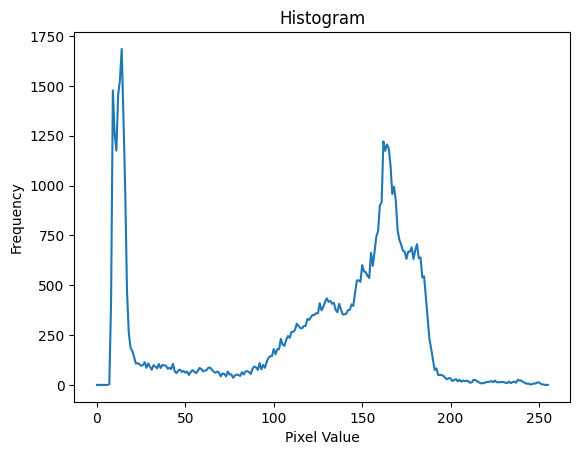

In [6]:
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

#### Application of Mask

In [3]:
img = cv.imread('images/cameraman.tif', cv.IMREAD_GRAYSCALE)

In [8]:
# Create a blank mask with the same dimensions as the image
mask = np.zeros(img.shape[:2], np.uint8)
mask[25:125, 50:150] = 255

In [9]:
# Generate the masked image by bitwise AND operation between the image and the mask
masked_img = cv.bitwise_and(img, img, mask=mask)

In [10]:
# Histogram with mask
hist_mask = cv.calcHist([img], [0], mask, [256], [0, 256])

# Histogram without mask
hist_full = cv.calcHist([img], [0], None, [256], [0, 256])

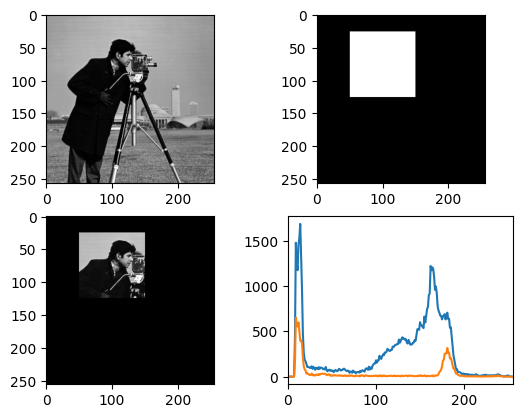

In [11]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

#### Histogram Equalization

There are two types of histogram equalization in OpenCV: 
1) Global Histogram Equalization
2) CLAHE (Contrast Limited Adaptive Histogram Equalization)

Clahe is used when the image has different lighting conditions in different areas. It divides the image into small blocks and applies histogram equalization to each block. It limits the contrast in each block to avoid noise amplification.

In [5]:
img = cv.imread('images/cameraman.tif', cv.IMREAD_GRAYSCALE)

In [6]:
# Global histogram equalization
equ = cv.equalizeHist(img)

#stacking images side-by-side
res = np.hstack((img,equ))

In [7]:
hist_equalized = cv.calcHist([res], [0], None, [256], [0, 256])

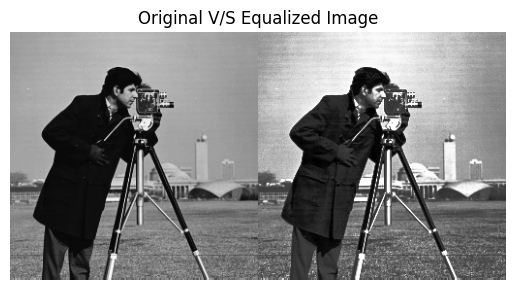

In [12]:
plt.axis('off')
plt.title('Original V/S Equalized Image')
plt.imshow(res, 'gray')
plt.show()

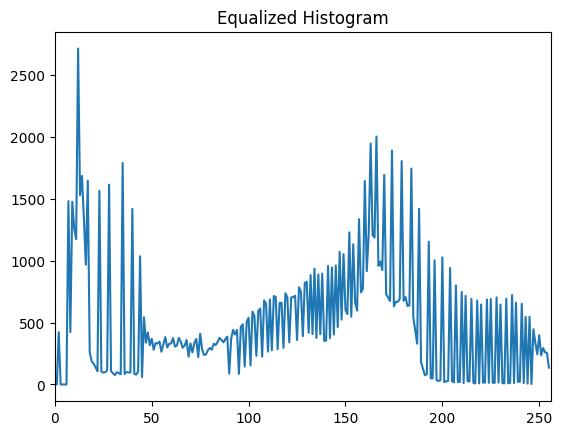

In [13]:
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.xlim([0,256])
plt.show()

In [17]:
# CLAHE
img = cv.imread('images/tsukuba_l.png', cv.IMREAD_GRAYSCALE)

In [18]:
# CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

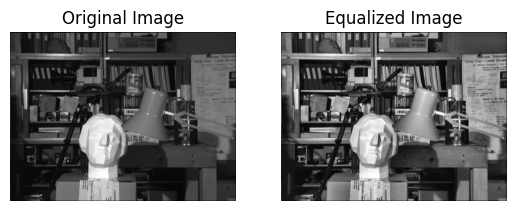

In [19]:
# Display the original image and the equalized image
plt.subplot(121), plt.imshow(img, 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122), plt.imshow(cl1, 'gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

In [20]:
# Create histograms of the original image and the equalized image
hist = cv.calcHist([img], [0], None, [256], [0, 256])
hist_cl1 = cv.calcHist([cl1], [0], None, [256], [0, 256])

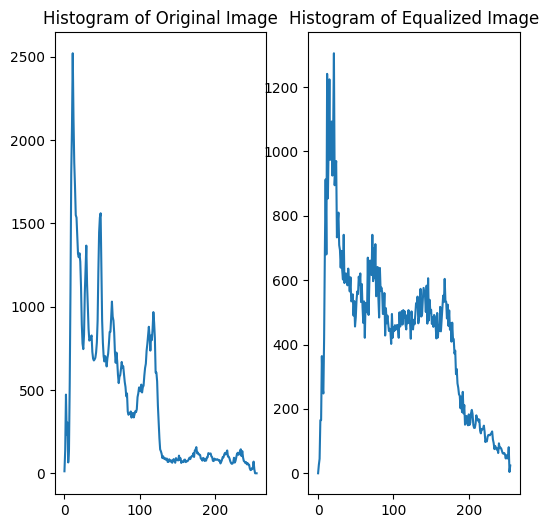

In [23]:
# Plot the histograms
plt.figure(figsize=(6,6))
plt.subplot(121), plt.plot(hist)
plt.title('Histogram of Original Image')
plt.subplot(122), plt.plot(hist_cl1)
plt.title('Histogram of Equalized Image')
plt.show()